# 2 Regressão Linear com Regularização

Carregando os dados que estão em formato MatLab

In [1]:
import scipy.io as spio
import numpy as np  
import matplotlib.pyplot as plt

from aprendizado_maquina import regressao_linear as rl
%matplotlib inline

In [2]:
data = spio.loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['Xtest', 'ytest', 'yval', '__globals__', 'y', 'X', 'Xval', '__version__', '__header__'])

In [3]:
X = np.c_[np.ones_like(data['X']), data['X']]
Xtest = data["Xtest"]
Xval = data["Xval"]

y = data["y"]
ytest = data["ytest"]
yval = data["yval"]

print('X_train:', X.shape)
print('y_train:', y.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 1)
yval: (21, 1)


### 2.1 Visualização dos Dados

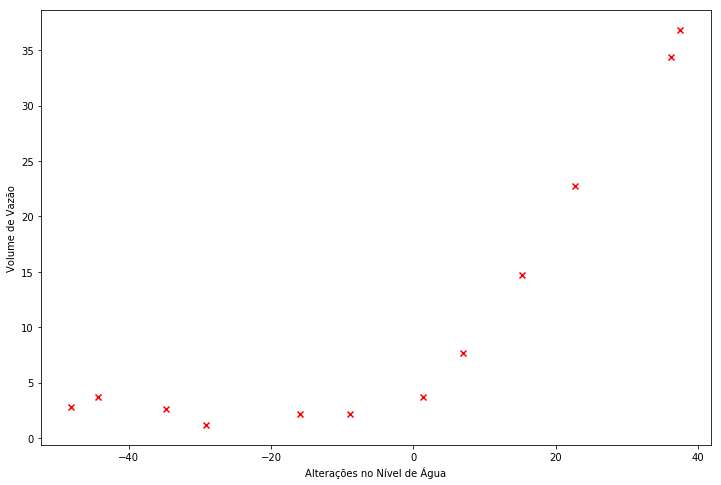

In [4]:
fig, ax = plt.subplots(figsize=(12,8)) 
ax.set_xlabel("Alterações no Nível de Água")  
ax.set_ylabel('Volume de Vazão')
ax.scatter(X[:,1], y, marker='x', c='r')

### 2.2 Função de custo da regressão linear regularizada

In [5]:
from aprendizado_maquina import regressao_linear as rl

In [6]:
theta_inicial = np.matrix(np.array([1,1]))
rl.custo_regressao_linear_regularizada(theta_inicial, X, y, 1)

303.95152555359761

### 2.3 Gradiente na regressão linear regularizada

In [8]:
def gradiente_descendente_batch_regularizado(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            if(j == 0):
                temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            else:
                temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term)) + ((alpha / len(X)) * theta[:,i])

        theta = temp
        cost[i] = custo_regressao_linear(X, y, theta)

    return theta, cost

In [11]:
theta = gradiente_descendente_batch_regularizado(theta_inicial, X, y, 0, iters = 1000)
theta

IndexError: tuple index out of range